In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
def k_nbor(df, k, x):
    
    minIndex = []
    Dist = np.sum((df[:,0:-1] - x)**2, axis=1)
    minL = np.sort(Dist)[0:k]   
    for k in range(k):
        minIndex.append(np.where(Dist == minL[k])[0][0])
    
    
    
    return np.sign(np.sum(df[minIndex,-1]))

In [62]:
def uniform(df, gamma, x):
    return np.sign(np.sum(df[:,-1]*np.exp(-gamma*np.sum((df[:,:-1]-x)**2,axis=1))))

In [119]:
def err(dftrain, dftest, parameter, method):
    ypred = []
    for t in dftest:
        ypred.append(method(dftrain, parameter, t[0:-1]))
    return np.sum((np.array(ypred) != dftest[:,-1]))/len(dftest)
    

In [114]:
dftrain = np.loadtxt('hw4_train.dat.txt')

In [115]:
dftest = np.loadtxt('hw4_test.dat.txt')

[0.0, 0.1, 0.16, 0.15, 0.14]


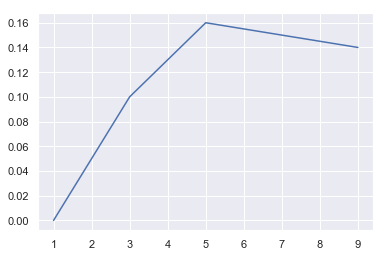

In [121]:
#Q11
K = [1,3,5,7,9]
E = []
for k in K:
    E.append(err(dftrain, dftrain, k, k_nbor))

sns.set()
sns.lineplot(K,E)
print(E)

Q11: Ein increases at first then decreases.

[0.344, 0.299, 0.316, 0.322, 0.303]


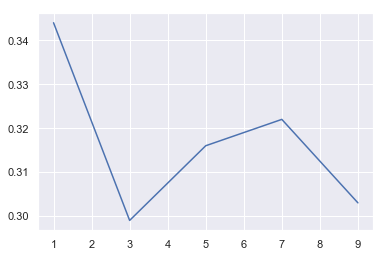

In [120]:
#Q12
K = [1,3,5,7,9]
E = []
for k in K:
    E.append(err(dftrain, dftest, k, k_nbor))

sns.set()
sns.lineplot(K,E)
print(E)

Q12: Eout does not vary much.

[0.45, 0.45, 0.02, 0.0, 0.0]


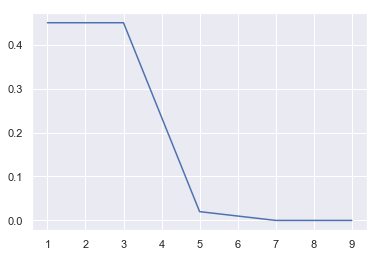

In [122]:
#Q12
Gamma = [0.001,0.1,1,10,100]
E = []
for gamma in Gamma:
    E.append(err(dftrain, dftrain, gamma, uniform))

sns.set()
sns.lineplot(K,E)
print(E)

Q13: Ein decreases to 0.

[0.467, 0.448, 0.288, 0.346, 0.344]


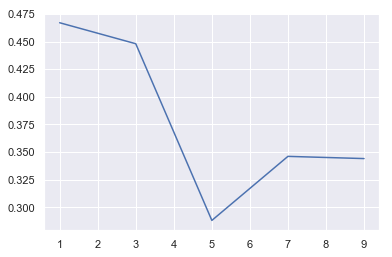

In [124]:
#Q12
Gamma = [0.001,0.1,1,10,100]
E = []
for gamma in Gamma:
    E.append(err(dftrain, dftest, gamma, uniform))

sns.set()
sns.lineplot(K,E)
print(E)

Q14: Eout decreases to its lowest then surges.